# Demo Notebook for ICER_Data_Package 
This notebook is for testing methods in DataAnalyzer class on ICER data files: GPFS and SLURM

In [1]:
# Import class
from ICER_package.DataAnalyzer import DataAnalyzer

## Step 1: Prepare Your Data Files
1. GPFS Data File: This file should be a text file with space-separated values, containing columns as described in read_gpfs method. The expected columns are "Inode (file unique ID)", "KB Allocated", "File Size", etc.
2. Slurm Data File: This file should be a text file with values separated by a pipe (|), according to read_slurm method's specification.

## Step 2: Initialize the DataAnalyzer Class

You'll need to provide paths to your GPFS and Slurm data files when initializing the DataAnalyzer class. If you only have one type of data file or the other, you can provide an empty string for the path you don't have.

In [2]:
# set gpfs path, slurm path, number of rows to read from in gpfs and slurm data 
analyzer = DataAnalyzer(gpfspath = "/mnt/research/CMSE495-SS24-ICER/file_system_usage/gpfs-stats/inode-size-age-jan-23", slurmpath="/mnt/scratch/alkhali7/DID_FINAL_SLURM_OCT_2023_aggregated.csv"
                    ,gpfs_nrows=1000,slurm_nrows=10000)


In [3]:
# To access each dataset; default number of rows=1,000
analyzer.gpfs_data.head()
analyzer.slurm_data.head()

,JobID,User,Group,Submit,Start,End,Elapsed,State,Account,AssocID,...,AllocCPUS,ReqMem,MaxRSS,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES,ReqMem_MB,MaxRSS_MB
201,87461884,user_600,group_090,2023-09-08 18:34:09,2023-09-29 21:30:06,2023-10-01T05:42:37,1 days 08:12:31,COMPLETED,account_011,assocID_575,...,64,32G,4500K,4,4,"lac-[084-086,193]","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4",32000.0,4.500
202,87461892,user_600,group_090,2023-09-08 18:34:11,2023-09-30 00:16:32,2023-10-01T06:19:40,1 days 06:03:08,COMPLETED,account_011,assocID_575,...,64,32G,4540K,4,4,"lac-[142,192,345,349]","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4",32000.0,4.540
203,87461900,user_600,group_090,2023-09-08 18:34:13,2023-09-30 01:07:56,2023-10-01T06:33:57,1 days 05:26:01,COMPLETED,account_011,assocID_575,...,64,32G,4536K,4,4,"lac-[080-081,342-343]","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4",32000.0,4.536
204,87461908,user_600,group_090,2023-09-08 18:34:15,2023-09-30 03:06:56,2023-10-01T09:16:02,1 days 06:09:06,COMPLETED,account_011,assocID_575,...,64,32G,4540K,4,4,"lac-[031,136,346-347]","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4",32000.0,4.540
205,87461916,user_600,group_090,2023-09-08 18:34:18,2023-09-30 08:13:45,2023-10-01T14:30:28,1 days 06:16:43,COMPLETED,account_011,assocID_575,...,64,32G,4604K,4,4,"lac-[083,196,344,348]","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4","billing=4980,cpu=64,gres/gpu=4,mem=32G,node=4",32000.0,4.604


In [4]:
gpfspath =  "/mnt/research/CMSE495-SS24-ICER/file_system_usage/gpfs-stats/inode-size-age-jan-23"

# 2nd Method: Use package method to read in data 
gpfs_20krows= analyzer.read_gpfs(gpfspath,nrows=20000)
gpfs_20krows.head()

In [7]:
analyzer.slurm_data.columns

Index(['JobID', 'User', 'Group', 'Submit', 'Start', 'End', 'Elapsed', 'State',
       'Account', 'AssocID', 'Partition', 'Timelimit', 'UserCPU', 'SystemCPU',
       'TotalCPU', 'CPUTime', 'CPUTimeRAW', 'ReqCPUS', 'AllocCPUS', 'ReqMem',
       'MaxRSS', 'ReqNodes', 'NNodes', 'NodeList', 'ReqTRES', 'AllocTRES',
       'ReqMem_MB', 'MaxRSS_MB', 'QueueTime (Minutes)', 'Timelimit (Minutes)'],
      dtype='object')

## Step 3: Use the DataAnalyzer Methods

With your data loaded into the DataAnalyzer instance, you can now use its methods to analyze the data.


1.  To identify users with many files in the GPFS data:

  Replace 100 with whatever file limit you're interested in. This method will return a DataFrame of users who have more files than the specified limit.
  The DataFrame returned by UsersWithManyFiles (users_with_many_files) will list users exceeding the specified file count, which can be useful for identifying heavy users or potential optimizations.

In [5]:
# Example usage on Default: 1000 rows of the gpfs pandas dataset
users_with_many_files = analyzer.UsersWithManyFiles(file_limit=100)

In [6]:
users_with_many_files.head()

,UID numeric ID for the owner of the file,Number of files
4,762231,4690
9,881083,2811
1,614955,2054
5,785573,1978
10,1000000092,1826


2. Files Per User Cumulative Distribution Plot
   - This method outputs a CDF plot for the Files for each user in the GPFS system
   - outputs a plot in png form in the same directory this notebook is ran from
   - Full_dataset parameter can only be set to true when running the method through a job script due to the size of data.
   - When parameter **full_dataset** = False, only 1,000 rows of the data is streamed.

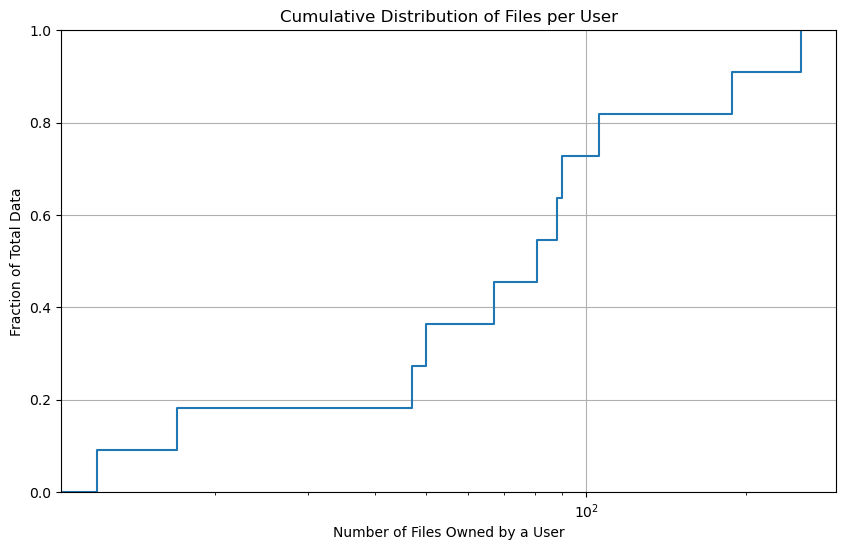

In [7]:
# full_dataset parameter can be set to only subset of data (1,000 rows) or full gpfs data
analyzer.files_per_user_gpfs(full_dataset=False)

3. Predict Waltime using Random Forest Model
   
   - Predictors: cpu, memory, node
   - Note: output changes as more rows are read in

R2 Score: 0.9496922198737988
Root Mean Squared Error: 552.1572533841768


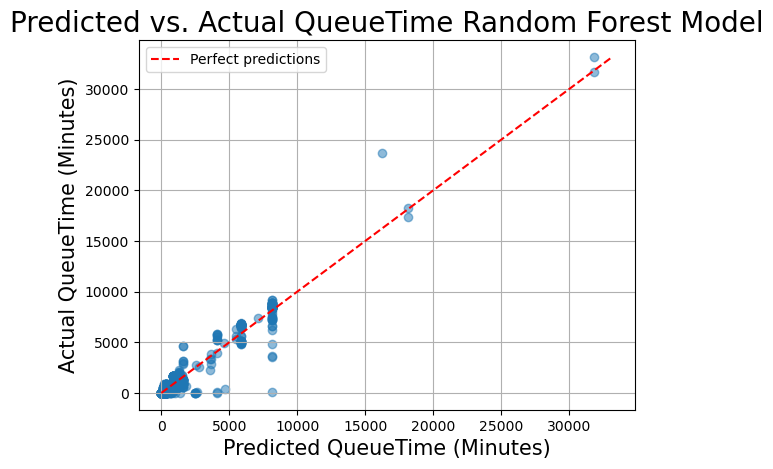

In [4]:
# Example usage
analyzer.predict_queuetime()

4. Find users/groups/jobs that underutilize most of their requested resources in the SLURM job system
   
   Purpose:
   - Detects SLURM jobs where the resources used are significantly less than those requested.
   - Parameters: Thresholds for time, CPU, nodes, and memory underutilization, plus minimum requested amounts for each resource.
   
    Functionality:
    - Calculates fractional underutilization for time, CPU, nodes, and memory.
    - Filters jobs based on minimum requests and underutilization thresholds.
    Output:
    - Data: Returns a DataFrame with job details, allocated resources, and underutilization percentages for flagged jobs

In [3]:
# Example Usage:
analyzer.find_underutilizer(time_threshold=0.2, cpu_threshold=0.1, nodes_threshold=0.1, 
                                       memory_threshold=0.1, min_time_requested=60, min_cpu_requested=4,
                                       min_nodes_requested=1, min_memory_requested=320000)


,User,JobID,Group,State,Account,AllocCPUS,NNodes,MaxRSS_MB,Elapsed,FractionalUnderutilizedCPU,FractionalUnderutilizedNodes,FractionalUnderutilizedMemory,FractionalUnderutilizedTime
632,user_426,90379608,group_069,COMPLETED,account_017,180,3,NaN,5 days 12:16:51,0.0,0.0,NaN,0.212223
1540,user_426,90607684,group_069,FAILED,account_017,180,3,NaN,5 days 12:38:56,0.0,0.0,NaN,0.210031
1542,user_401,90621700,group_003,COMPLETED,account_078,128,4,23857.656,0 days 10:33:39,0.0,0.0,0.937871,0.937138
1545,user_426,90657784,group_069,FAILED,account_017,180,3,NaN,5 days 07:33:07,0.0,0.0,NaN,0.240385
1546,user_426,90658736,group_069,FAILED,account_017,180,3,NaN,5 days 06:48:46,0.0,0.0,NaN,0.244787
2163,user_100,91138708,group_003,COMPLETED,account_078,36,12,29827.164,3 days 04:10:41,0.0,0.0,0.985205,0.523887
2164,user_100,91138976,group_003,COMPLETED,account_078,64,4,16546.036,3 days 11:34:55,0.0,0.0,0.956911,0.164181
2194,user_100,91175500,group_003,FAILED,account_078,100,10,61776.112,3 days 13:35:18,0.0,0.0,0.967486,0.405637
2196,user_100,91177032,group_003,CANCELLED by 6017440,account_078,40,10,36238.356,4 days 20:17:11,0.0,0.0,0.979868,0.273210
2289,user_525,91363480,group_133,COMPLETED,account_068,120,6,759.168,2 days 05:22:15,0.0,0.0,0.998735,0.682316


Thank you.